<a href="https://colab.research.google.com/github/GabrielMarkss/GoogleColabBD/blob/main/ProjetoTAVBD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
# Importa a biblioteca pandas como pd

In [2]:
import matplotlib.pyplot as plt
# Importa a biblioteca pyplot do sub-módulo dentro do pacote matplotlib como plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')
# Importa o código do Google Drive no ambiente do Google Colab.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
dataset = pd.read_csv('dataset-BTC.csv', sep=';', encoding='iso-8859-1')
dataset
# Este código lê um arquivo CSV chamado 'dataset-.csv' usando a biblioteca pandas, carregando-o em um DataFrame. Ele usa ';' como separador
# de campo e a codificação ISO 8859-1 para interpretar os caracteres, e salva isso em uma variavel chamada 'dataset'

,Data,Abertura,Máxima,Mínima,Fechamento,Ajustes pós-fechamento,Volume
0,01/01/2024,42.280.234.375,441.754.375,422.149.765.625,4.416.733.203.125,4.416.733.203.125,18.426.978.443
1,02/01/2024,44.187.140.625,4.589.970.703.125,4.417.694.921.875,4.495.796.875,4.495.796.875,39.335.274.536
2,03/01/2024,449.616.015.625,455.032.421.875,4.081.353.515.625,4.284.817.578.125,4.284.817.578.125,46.342.323.118
3,04/01/2024,4.285.581.640.625,447.700.234.375,4.267.517.578.125,44.179.921.875,44.179.921.875,30.448.091.210
4,05/01/2024,4.419.298.046.875,4.435.328.515.625,4.278.471.875,4.416.269.140.625,4.416.269.140.625,32.336.029.347
...,...,...,...,...,...,...,...
107,17/04/2024,6.383.184.765.625,6.448.636.328.125,597.685.859.375,6.127.669.140.625,6.127.669.140.625,41.915.247.049
108,18/04/2024,6.127.531.640.625,641.256.875,6.083.348.046.875,6.351.275.390.625,6.351.275.390.625,36.006.307.335
109,19/04/2024,63510.75,6.548.159.765.625,59.651.390.625,638.435.703.125,638.435.703.125,49.920.425.401
110,20/04/2024,638.511.015.625,6.544.245.703.125,6.317.240.234.375,6.499.444.140.625,6.499.444.140.625,23.097.485.495


In [30]:
dataset['Abertura'] = dataset['Abertura'].str.replace('.', '').astype(float)
mean_volume = dataset['Abertura'].mean()
print("A média da abertura é:", mean_volume)

A média da Abertura é: 1942665346900.8928


In [36]:
sum_volume = dataset['Abertura'].sum()
print("A soma do valor de abertura é:", sum_volume)

A soma do valor de abertura é: 217578518852900.0


In [35]:
max_volume = dataset['Abertura'].max()
print("O maior valor de abertura é:", max_volume)

O maior valor de abertura é: 6499281640625.0


In [34]:
min_volume = dataset['Abertura'].min()
print("O menor valor de abertura é:", min_volume)

O menor valor de abertura é: 716325.0


In [33]:
median_volume = dataset['Abertura'].median()
print("A mediana do valor de abertura é:", median_volume)

A mediana do valor de abertura é: 660377187500.0


In [32]:
std_volume = dataset ['Abertura'].std()
print("O Desvio Padrão do valor de abertura é:", std_volume)

O Desvio Padrão do valor de abertura é: 2338702997639.1816


In [6]:
dataset.groupby('Data')['Abertura'].describe()

,count,unique,top,freq
Data,,,,
01/01/2024,1,1,42.280.234.375,1
01/02/2024,1,1,4.256.976.171.875,1
01/03/2024,1,1,611.680.625,1
01/04/2024,1,1,71.333.484.375,1
02/01/2024,1,1,44.187.140.625,1
...,...,...,...,...
29/03/2024,1,1,70.744.796.875,1
30/01/2024,1,1,433.002.265.625,1
30/03/2024,1,1,698.934.453.125,1


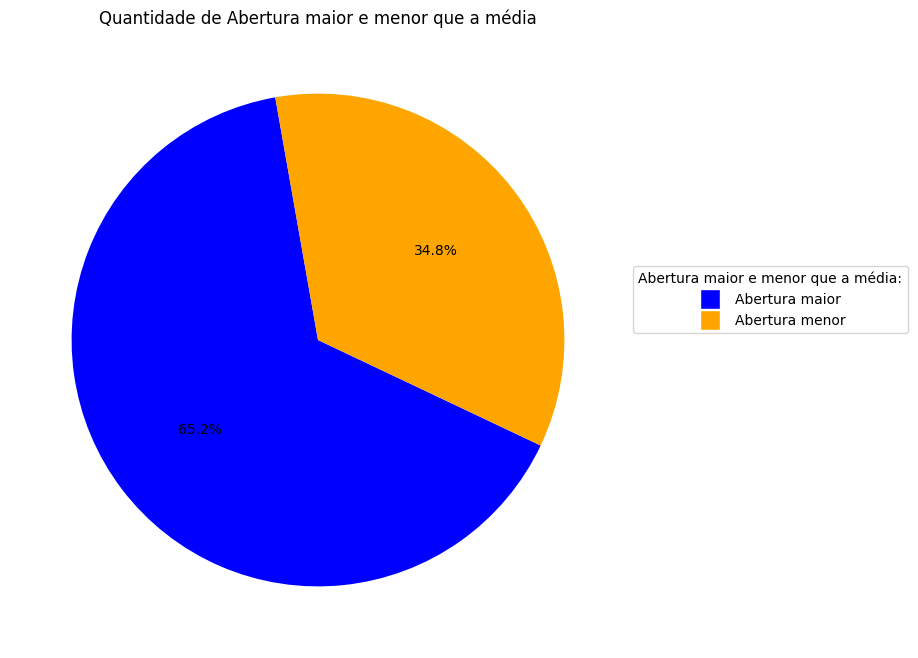

In [ ]:
dataset['Abertura'] = dataset['Abertura'].str.replace('.', '').str.replace(',', '.').astype(float)

aberturas_menores = dataset[dataset['Abertura'] < 1942665346900.8928]['Abertura'].count()
aberturas_maiores = dataset[dataset['Abertura'] >= 1942665346900.8928]['Abertura'].count()

# Definição das cores
cores = ['blue', 'orange']

# Gráfico de pizza
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie([aberturas_menores, aberturas_maiores], colors=cores, autopct='%1.1f%%', startangle=100)

# Adicionando os quadrados de cor
legend_labels = ['Abertura maior', 'Abertura menor']
legend_patches = [plt.Line2D([0], [0], marker='s', color='w', markersize=15, markerfacecolor=cor) for cor in cores]
ax.legend(legend_patches, legend_labels, title="Abertura maior e menor que a média:", loc="lower left", bbox_to_anchor=(1, 0.5), ncol=1)

plt.title('Quantidade de Abertura maior e menor que a média')
plt.show()

In [ ]:
# GRÁFICO DE PIZZA

# Este código começa substituindo os pontos de separação por uma string vazia e substituindo vírgulas por pontos na coluna 'Abertura' do
# dataset. Em seguida, conta quantas aberturas são menores e maiores que um valor específico. Define as cores para o gráfico de pizza como
# azul e laranja. Em seguida, cria um gráfico de pizza com as porcentagens de aberturas menores e maiores, começando o ângulo de exibição
# a 100 graus. Adiciona legendas ao gráfico com quadrados coloridos representando as aberturas maiores e menores, respectivamente, e exibe
# o título "Quantidade de Abertura maior e menor que a média".

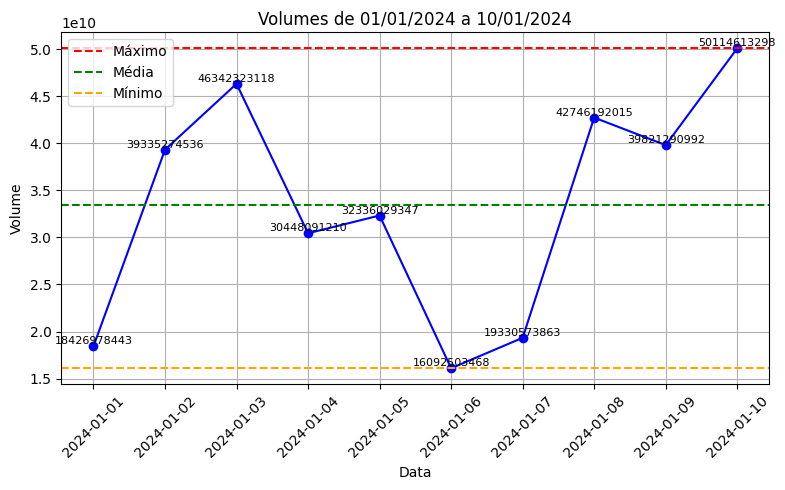

In [ ]:
dataset = pd.read_csv('dataset-BTC.csv', sep=';', encoding='iso-8859-1')

# Convertendo a coluna 'Data' para o tipo datetime
dataset['Data'] = pd.to_datetime(dataset['Data'], format='%d/%m/%Y')

# Removendo os pontos de separação da coluna 'Volume' e convertendo para float
dataset['Volume'] = dataset['Volume'].str.replace('.', '').astype(float)

# Filtrando o dataset para o intervalo de datas desejado (01/01/2024 a 10/01/2024)
dataset_grafico2 = dataset[(dataset['Data'] >= '2024-01-01') & (dataset['Data'] <= '2024-01-10')]

# Plotando o gráfico de linha
plt.figure(figsize=(8, 5))
plt.plot(dataset_grafico2['Data'], dataset_grafico2['Volume'], color='blue', marker='o')
plt.title('Volumes de 01/01/2024 a 10/01/2024')
plt.xlabel('Data')
plt.ylabel('Volume')
plt.grid(True)

# Adicionando linhas horizontais para destacar subidas e quedas
media_volume = dataset_grafico2['Volume'].mean()
plt.axhline(y=dataset_grafico2['Volume'].max(), color='red', linestyle='--', label='Máximo')  # Linha máximo
plt.axhline(y=media_volume, color='green', linestyle='--', label='Média')  # Linha média
plt.axhline(y=dataset_grafico2['Volume'].min(), color='orange', linestyle='--', label='Mínimo')  # Linha mínimo

# Adicionando o valor do volume em cada ponto do gráfico
for index, row in dataset_grafico2.iterrows():
    plt.text(row['Data'], row['Volume'], str(int(row['Volume'])), color='black', fontsize=8, ha='center', va='bottom')

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# GRÁFICO EM LINHAS
# Este código carrega um conjunto de dados, converte a coluna 'Data' para o tipo datetime e remove os pontos de separação da coluna
# 'Volume', convertendo-a para float. Em seguida, filtra o dataset para o intervalo de datas desejado (01/01/2024 a 10/01/2024) e
# plota um gráfico de linha mostrando os volumes ao longo do tempo. Linhas horizontais são adicionadas para destacar a média, o
# máximo e o mínimo dos volumes. Além disso, o valor de cada ponto do gráfico é adicionado como texto. Finalmente, o gráfico é
# exibido com rótulos apropriados e legenda.



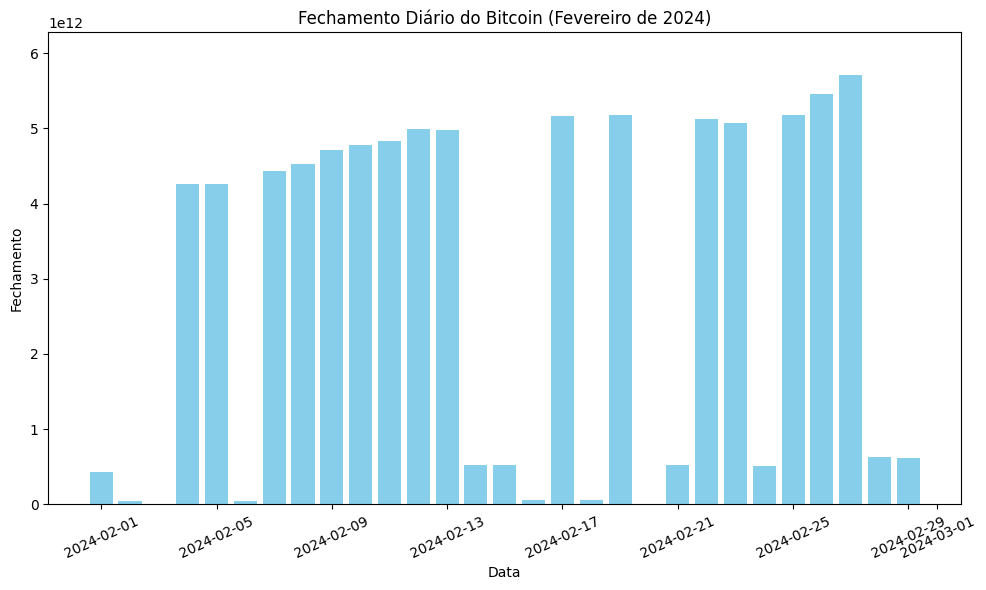

In [ ]:
dataset = pd.read_csv('dataset-BTC.csv', sep=';', encoding='iso-8859-1')

# Convertendo a coluna 'Data' para o tipo datetime
dataset['Data'] = pd.to_datetime(dataset['Data'], format='%d/%m/%Y')

# Removendo os pontos de separação da coluna 'Fechamento' e convertendo para float
dataset['Fechamento'] = dataset['Fechamento'].str.replace('.', '').astype(float)

# Filtrando o dataset para o intervalo de datas desejado (01/02/2024 a 29/02/2024)
dataset_fevereiro = dataset[(dataset['Data'] >= '2024-02-01') & (dataset['Data'] <= '2024-02-29')]

# Plotando o histograma de barras na vertical
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(x=dataset_fevereiro['Data'], height=dataset_fevereiro['Fechamento'], color='skyblue')

# Limitando os valores do eixo y
max_fechamento = dataset_fevereiro['Fechamento'].max()
ax.set_ylim(0, max_fechamento + max_fechamento * 0.1)  # Aumenta 10% do valor máximo para a margem

ax.set_title('Fechamento Diário do Bitcoin (Fevereiro de 2024)')
ax.set_xlabel('Data')
ax.set_ylabel('Fechamento')
plt.xticks(rotation=25)  # Rotaciona os rótulos do eixo x para facilitar a leitura
plt.tight_layout()
plt.show()


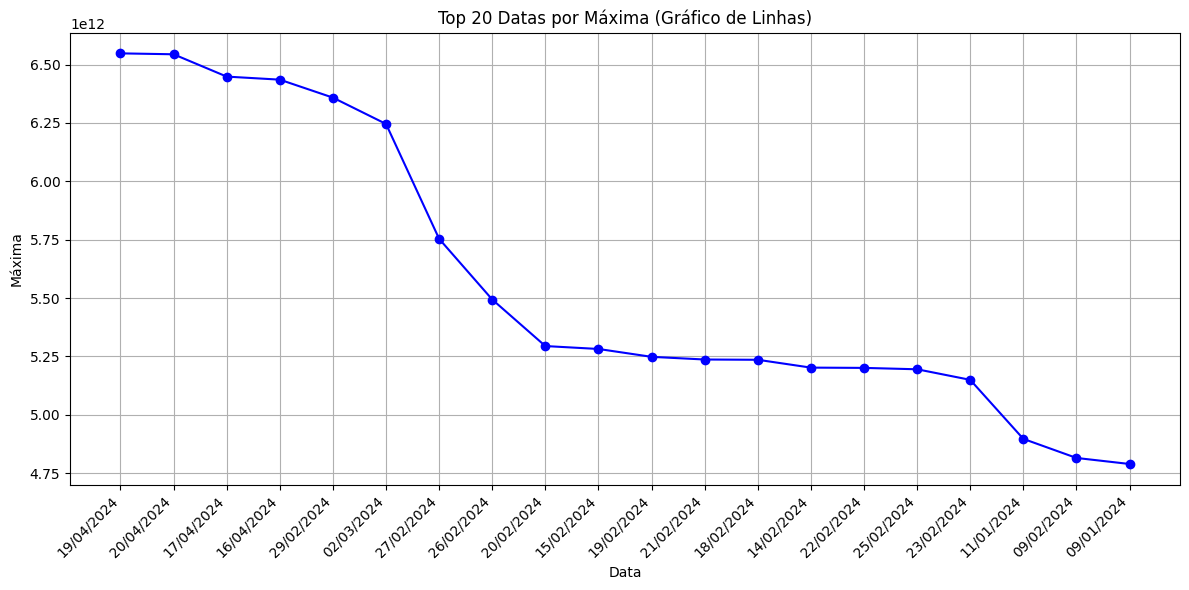

In [ ]:
dataset = pd.read_csv('dataset-BTC.csv', sep=';', encoding='iso-8859-1')

# Removendo os pontos de separação da coluna 'Máxima' e 'Mínima'
dataset['Máxima'] = dataset['Máxima'].str.replace('.', '').astype(float)
dataset['Mínima'] = dataset['Mínima'].str.replace('.', '').astype(float)

# Agrupar por 'Data' e obter o valor máximo de 'Máxima'
data_maxima = dataset.groupby('Data')['Máxima'].max().reset_index()

# Ordenar os dados pela 'Máxima' em ordem decrescente
data_maxima = data_maxima.sort_values(by='Máxima', ascending=False)

# Selecionar os 20 maiores valores
top_20_maxima = data_maxima.head(20)

# Plotar o gráfico de linhas para 'Máxima'
plt.figure(figsize=(12, 6))
plt.plot(top_20_maxima['Data'], top_20_maxima['Máxima'], marker='o', linestyle='-', color='b')
plt.title('Top 20 Datas por Máxima (Gráfico de Linhas)')
plt.xlabel('Data')
plt.ylabel('Máxima')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

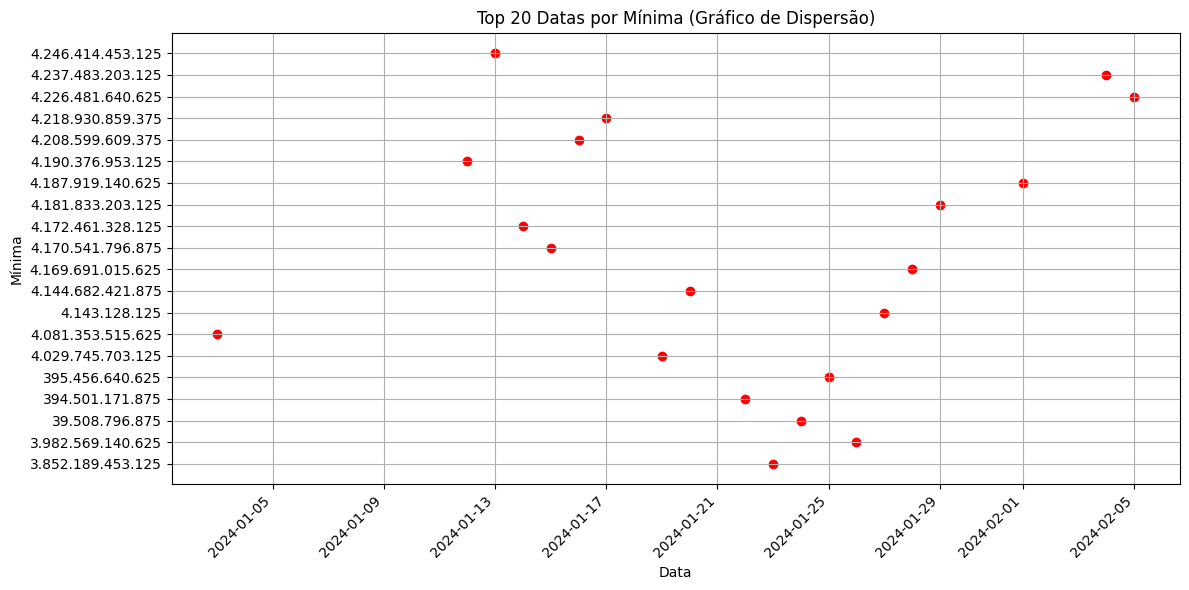

In [ ]:
# Agrupar por 'Data' e obter o valor mínimo de 'Mínima'
data_minima = dataset.groupby('Data')['Mínima'].min().reset_index()

# Ordenar os dados pela 'Mínima' em ordem crescente
data_minima = data_minima.sort_values(by='Mínima', ascending=True)

# Selecionar os 20 menores valores
top_20_minima = data_minima.head(20)

# Plotar o gráfico de dispersão para 'Mínima'
plt.figure(figsize=(12, 6))
plt.scatter(top_20_minima['Data'], top_20_minima['Mínima'], color='r')
plt.title('Top 20 Datas por Mínima (Gráfico de Dispersão)')
plt.xlabel('Data')
plt.ylabel('Mínima')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


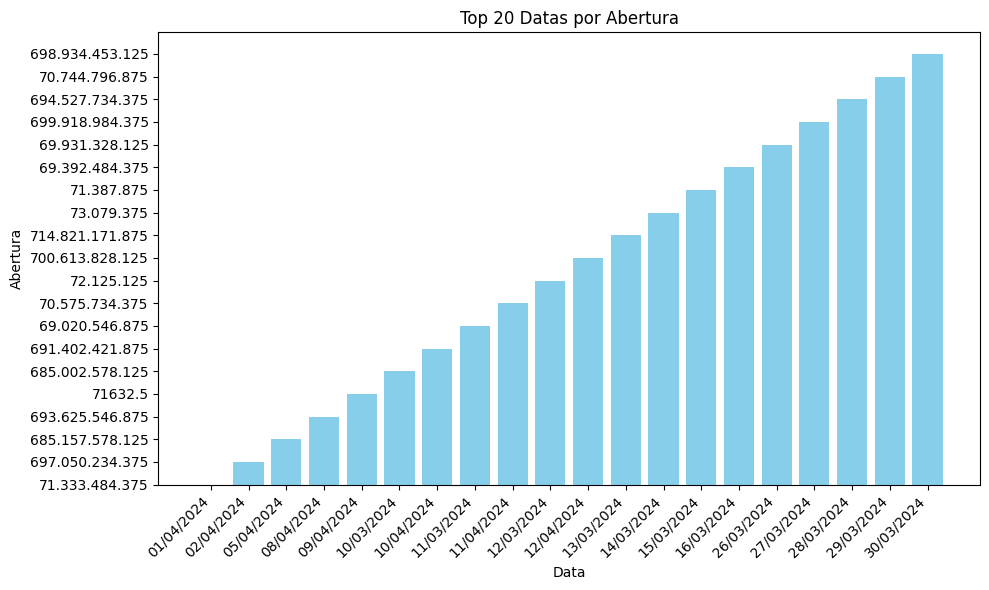

In [ ]:
data_abertura = dataset.groupby('Data')['Abertura'].sum().reset_index()

# Ordenar os dados pela soma das aberturas em ordem decrescente
data_abertura = data_abertura.sort_values(by='Abertura', ascending=False)

# Selecionar os 20 maiores valores
top_20_aberturas = data_abertura.head(20)

# Reordenar os dados selecionados pela 'Data' para melhorar a visualização
top_20_aberturas = top_20_aberturas.sort_values(by='Data')

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_20_aberturas['Data'], top_20_aberturas['Abertura'], color='skyblue')
plt.title('Top 20 Datas por Abertura')
plt.xlabel('Data')
plt.ylabel('Abertura')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# GRÁFICO EM COLUNAS

# Este código carrega um conjunto de dados, converte a coluna 'Data' para o tipo datetime e remove os pontos de separação da coluna
# 'Fechamento', convertendo-a para float. Em seguida, filtra o dataset para o intervalo de datas desejado (01/02/2024 a 29/02/2024)
# e plota um histograma de barras horizontais representando o fechamento diário do Bitcoin em fevereiro de 2024.

# Para adicionar os valores de fechamento na parte inferior de cada barra, iteramos sobre as barras e usamos o método text() para
# adicionar o valor de fechamento. Além disso, limitamos os valores do eixo x para garantir que todas as barras sejam visíveis,
# aumentando o valor máximo em 25%. O gráfico é então exibido com rótulos apropriados.

In [ ]:
# Média
# dataset ['idade'].mean()
# Mediana
# dataset ['idade'].median()
# Mínimo
# dataset ['idade'].min()
# Máximo
# dataset ['idade'].max()
# Desvio Padrão
# dataset ['idade'].std()

In [ ]:
dataset.groupby('sexo')['sexo'].count()

sexo
F     950
M    1050
Name: sexo, dtype: int64

In [ ]:
dataset.groupby('idade')['idade'].count()

idade
8.0       1
9.0       9
10.0      7
11.0     10
12.0     12
         ..
96.0      1
99.0      2
100.0     1
117.0     1
118.0    27
Name: idade, Length: 91, dtype: int64